In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


# Combining data

Combining datasets

In [2]:
# drop the rest 
keep_cols_all = ["CANONICAL_SMILES", "INCHIKEY", "active", "dataset", "data_type", "common_name", "action_type"]


# NCATS
This is a pretty messy AID, but we will take what we can get, was also classified prior to pubchem upload




In [3]:
ncats = pd.read_csv("processed/ncats_adme_aid1645840.csv")

In [4]:
ncats.head()

,CANONICAL_SMILES,INCHIKEY,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_CID,dataset,data_type,common_name,action_type,active
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,Active,197033,ncats_adme_aid1645840,assay,NaN,inhibitor,True
1,O=c1c(O)c(-c2ccc(O)cc2O)oc2cc(O)cc(O)c12,YXOLAZRVSSWPPT-UHFFFAOYSA-N,Inactive,5281670,ncats_adme_aid1645840,assay,NaN,inhibitor,False
2,Cc1ccc(C(=O)NC2C(=O)NC(C(C)C)C(=O)N3CCCC3C(=O)...,GQBHKSFHNFMVES-TYWDLNKHSA-N,Inactive,6604832,ncats_adme_aid1645840,assay,NaN,inhibitor,False
3,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,Active,5280443,ncats_adme_aid1645840,assay,NaN,inhibitor,True
4,NC(Cc1ccc(O)c(O)c1)C(=O)O,WTDRDQBEARUVNC-UHFFFAOYSA-N,Inactive,836,ncats_adme_aid1645840,assay,NaN,inhibitor,False


In [5]:
ncats_actives = ncats.query("active == True")
ncats_actives = ncats_actives[keep_cols_all]
ncats_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor
3,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor
6,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,LFBZZHVSGAHQPP-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor
7,CC(=O)C1(O)C=C2C(=O)c3c(c(O)c4ccccc4c3O)C(=O)C...,SZWGDFGULWLMIP-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor
8,COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC,GFNNBHLJANVSQV-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
5225,CCNC(C)Cc1cccc(C(F)(F)F)c1,DBGIVFWFUFKIQN-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor
5228,O=C(Nc1cccc2c(=O)cc(-c3nn[nH]n3)oc12)c1ccc(OCC...,NBQKINXMPLXUET-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor
5231,O=C(CCCN1CCC(O)(c2cccc(C(F)(F)F)c2)CC1)c1ccc(F...,GPMXUUPHFNMNDH-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor
5233,C=CCN1CCC23c4c5ccc(O)c4OC2C(=O)CC[C@@]3(O)C1C5,UZHSEJADLWPNLE-AQBRWLJTSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor


# Veith

Assay data from veith et al


In [6]:
veith = pd.read_csv("processed/veith_2009.csv")
veith.head
veith.drop(columns="SMILES", inplace=True)

In [7]:
veith_actives = veith.query("active == True")
veith_actives = veith_actives[keep_cols_all]

In [8]:
veith_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
2,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,JGYZDKDCKPRYSN-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
5,N=c1n(CCN2CCOCC2)c2ccccc2n1CC(=O)c1ccc(Cl)c(Cl)c1,UKWNAMLDDFVOMY-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
11,COc1cccc2c(=O)c(C(=O)NCc3cccs3)c[nH]c12,XIIVPABVOIFYAE-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
13,Cc1ccc2c(c1)nnn2C1CCN(CC(=O)N2c3ccccc3CC2C)CC1,WTHIMPRNVATMHO-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
19,CCSC1=C(C#N)C2(CCCCC2)C(C#N)C(=N)N1,WXAXRDFIUNHSOH-UHFFFAOYSA-N,True,veith_2009,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
12981,C#CCCCO/N=C1/C[C@@H](O)[C@@H](O)[C@@H]2c3c(c(O...,SMHSAIHMDVPETB-BKEMUOMBSA-N,True,veith_2009,assay,NaN,inhibitor
13028,CCOC(=O)CCn1c(O)c2c(c1O)[C@H]1[C@H](O)[C@H](O)...,PGJAFDNEOIWELY-MYYMVHGHSA-N,True,veith_2009,assay,NaN,inhibitor
13043,CCOC(=O)CCn1c(O)c2c(c1O)[C@H]1[C@H](O)[C@H](O)...,PGJAFDNEOIWELY-HCGDDDAFSA-N,True,veith_2009,assay,NaN,inhibitor
13047,C#CCCCO/N=C1/C[C@@H](O)[C@@H](O)[C@@H]2c3c(c(O...,CVLXALCKKPFLMZ-NFTOMXRGSA-N,True,veith_2009,assay,NaN,inhibitor


# PubChem AIDS

625249 and 678715 are already in Chembl, so we don't repeat those here

1919972 was full of junk metadata so we will ignore

read in 1851 and 891



In [9]:
aid_1851 = pd.read_csv("processed/AID_1851.csv")
aid_1851_actives = aid_1851.query("active == True")
aid_1851_actives = aid_1851_actives[keep_cols_all]

In [10]:
aid_1851_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
5,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,JGYZDKDCKPRYSN-UHFFFAOYSA-N,True,aid1851,assay,NaN,inhibitor
9,N=c1n(CCN2CCOCC2)c2ccccc2n1CC(=O)c1ccc(Cl)c(Cl)c1,UKWNAMLDDFVOMY-UHFFFAOYSA-N,True,aid1851,assay,NaN,inhibitor
18,COc1cccc2c(=O)c(C(=O)NCc3cccs3)c[nH]c12,XIIVPABVOIFYAE-UHFFFAOYSA-N,True,aid1851,assay,NaN,inhibitor
21,Cc1ccc2c(c1)nnn2C1CCN(CC(=O)N2c3ccccc3CC2C)CC1,WTHIMPRNVATMHO-UHFFFAOYSA-N,True,aid1851,assay,NaN,inhibitor
29,CCSC1=C(C#N)C2(CCCCC2)C(C#N)C(=N)N1,WXAXRDFIUNHSOH-UHFFFAOYSA-N,True,aid1851,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
16931,C#CCCCO/N=C1/C[C@@H](O)[C@@H](O)[C@@H]2c3c(c(O...,SMHSAIHMDVPETB-BKEMUOMBSA-N,True,aid1851,assay,NaN,inhibitor
16990,CCOC(=O)CCn1c(O)c2c(c1O)[C@H]1[C@H](O)[C@H](O)...,PGJAFDNEOIWELY-MYYMVHGHSA-N,True,aid1851,assay,NaN,inhibitor
17008,CCOC(=O)CCn1c(O)c2c(c1O)[C@H]1[C@H](O)[C@H](O)...,PGJAFDNEOIWELY-HCGDDDAFSA-N,True,aid1851,assay,NaN,inhibitor
17012,C#CCCCO/N=C1/C[C@@H](O)[C@@H](O)[C@@H]2c3c(c(O...,CVLXALCKKPFLMZ-NFTOMXRGSA-N,True,aid1851,assay,NaN,inhibitor


In [11]:
aid_891 = pd.read_csv("processed/AID_891.csv")
aid_891_actives = aid_891.query("active == True")
aid_891_actives = aid_891_actives[keep_cols_all]

In [12]:
aid_891_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
0,CC[C@@H]1CN2CC[C@@H]1C[C@H]2[C@@H](O)c1ccnc2cc...,LJOQGZACKSYWCH-NSMLZSOPSA-N,True,aid891,assay,NaN,inhibitor
1,CO[C@@]12C[C@@H](COC(=O)c3cncc(Br)c3)CN(C)[C@H...,YSEXMKHXIOCEJA-OECQAKIHSA-N,True,aid891,assay,NaN,inhibitor
2,COC(=O)C1=CO[C@@H](C)[C@H]2CN3CCc4c([nH]c5cccc...,GRTOGORTSDXSFK-XJTZBENFSA-N,True,aid891,assay,NaN,inhibitor
3,CNCCCCCCCCSc1nc(C(C)C)ccc1C(=O)c1cccs1,XDTWTSUSEOWBTP-UHFFFAOYSA-N,True,aid891,assay,NaN,inhibitor
4,CCC(Oc1ccc(Cl)cc1)C(=O)OC1C[C@H]2CC[C@@H](C1)N2C,WTPAXDRULIZRDJ-CBHXASLJSA-N,True,aid891,assay,NaN,inhibitor
...,...,...,...,...,...,...,...
1771,Cc1cc(O)c2c(c1)C(=O)c1cc(O)cc(O)c1C2=O,RHMXXJGYXNZAPX-UHFFFAOYSA-N,True,aid891,assay,NaN,inhibitor
1772,COCCNc1ncnc2ccc(-c3ccccc3C)cc12,GITQACYQYNMNCY-UHFFFAOYSA-N,True,aid891,assay,NaN,inhibitor
1773,FC(F)(F)c1ccccc1-c1nc(Nc2ccncc2)c2ccccc2n1,KEOSJTIYNSQYET-UHFFFAOYSA-N,True,aid891,assay,NaN,inhibitor
1774,CCCN(CCC)C1Cc2cc(OC)c(OC)cc2C1,UOLJKAPABHXFRE-UHFFFAOYSA-N,True,aid891,assay,NaN,inhibitor


# Chembl

The chembl data is an aggregation for CYP2D6  

Some postprocessing steps have been applied to select high quality actives from the range of assays available, defs not the only way to do this. 




* Select assays with IC50, AC50, pIC50, XC50, EC50, Ki or potency endpoints
* Select assays in nM
* Select assays with >=  N molecules (10)
* Select compounds with mean pChembl > 5 accross all assays
* Select compounds that appear in >= L of assays



In [13]:
chembl_actives = pd.read_csv("processed/chembl_active_selected.csv")
chembl_actives.head()

,CANONICAL_SMILES,INCHIKEY,pChEMBL mean,pChEMBL std,common_name,appears_in_N_ChEMBL_assays,action_type,dataset,active
0,COC(=O)C1[C@@H](O)CC[C@H]2CN3CCc4c([nH]c5ccccc...,BLGXFZZNTVWLAY-UKQGOTKBSA-N,6.220000,1.003707,NaN,15,NaN,ChEMBL_curated,True
1,CC(C)NC[C@@H](O)COc1cccc2ccccc12,AQHHHDLHHXJYJD-CQSZACIVSA-N,5.209231,0.262883,DEXPROPRANOLOL,13,NaN,ChEMBL_curated,True
2,CNCC[C@H](Oc1ccc(C(F)(F)F)cc1)c1ccccc1,RTHCYVBBDHJXIQ-INIZCTEOSA-N,5.520000,0.335989,NaN,10,NaN,ChEMBL_curated,True
3,C=C[C@H]1CN2CC[C@H]1C[C@@H]2[C@@H](O)c1ccnc2cc...,LOUPRKONTZGTKE-LHHVKLHASA-N,7.613750,0.526984,QUINIDINE SULFATE,9,NaN,ChEMBL_curated,True
4,COC(=O)C1[C@H]2C[C@H]3c4[nH]c5ccccc5c4CCN3C[C@...,BLGXFZZNTVWLAY-AMZRAFDVSA-N,6.127500,1.274192,YOHIMBINE,8,NaN,ChEMBL_curated,True


# FDA approved

Compounds the FDA really reccomends you try

In [14]:
fda = pd.read_csv("./FDA/fda.csv")

In [15]:
fda

,SMILES,active,common_name,action_type,FDA_recommended,dataset,INCHIKEY
0,C1CNC[C@H]([C@@H]1C2=CC=C(C=C2)F)COC3=CC4=C(C=...,True,paroxetine,inhibitor,True,FDA,AHOUBRCZNHFOSL-YOEHRIQHSA-N
1,COC1=CC2=C(C=CN=C2C=C1)[C@@H]([C@H]3C[C@@H]4CC...,True,quinidine,inhibitor,True,FDA,LOUPRKONTZGTKE-LHHVKLHASA-N
2,CNCCC(C1=CC=CC=C1)OC2=CC=C(C=C2)C(F)(F)F,True,fluoxetine,inhibitor,True,FDA,RTHCYVBBDHJXIQ-UHFFFAOYSA-N
3,C1=CC=C(C=C1)[C@H](CNCCC2=CC=C(C=C2)NC(=O)CC3=...,True,Mirabegron,inhibitor,True,FDA,PBAPPPCECJKMCM-IBGZPJMESA-N


# Flockheart table

In [16]:
flockheart = pd.read_csv("./processed/flockheart.csv")
flockheart.drop(columns="SMILES", inplace=True)

# Combine everything


## NOTE

common name being blank is not that these compounds do not have a common name, but that they need to be pulled from pubchem

In [17]:
combined_literature = pd.concat([ncats_actives, veith_actives, fda, aid_1851_actives, aid_891_actives, flockheart])
combined_literature

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN
3,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN
6,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,LFBZZHVSGAHQPP-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN
7,CC(=O)C1(O)C=C2C(=O)c3c(c(O)c4ccccc4c3O)C(=O)C...,SZWGDFGULWLMIP-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN
8,COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC,GFNNBHLJANVSQV-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN
...,...,...,...,...,...,...,...,...,...
38,CN[C@H]1CC[C@@H](c2ccc(Cl)c(Cl)c2)c2ccccc21,VGKDLMBJGBXTGI-SJCJKPOMSA-N,True,flockheart,NaN,sertraline,inhibitor,NaN,NaN
39,CN(C/C=C/C#CC(C)(C)C)Cc1cccc2ccccc12,DOMXUEMWDBAQBQ-WEVVVXLNSA-N,True,flockheart,NaN,terbinafine,inhibitor,NaN,NaN
40,Clc1ccccc1CN1CCc2sccc2C1,PHWBOXQYWZNQIN-UHFFFAOYSA-N,True,flockheart,NaN,ticlopidine,inhibitor,NaN,NaN
41,CN(C)CCN(Cc1ccccc1)c1ccccn1,UFLGIAIHIAPJJC-UHFFFAOYSA-N,True,flockheart,NaN,tripelennamine,inhibitor,NaN,NaN


In [18]:
# combined_literature["FDA_recommended"] = combined_literature["FDA_recommended"].fillna(False)

In [19]:
combined_literature.INCHIKEY.duplicated().sum()  # close same result with SMILES

4543

In [20]:
combined_literature.dropna(subset="INCHIKEY", inplace=True)

In [21]:
combined_literature_chembl = pd.concat([combined_literature, chembl_actives])

In [22]:
combined_literature_chembl

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
3,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
6,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,LFBZZHVSGAHQPP-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
7,CC(=O)C1(O)C=C2C(=O)c3c(c(O)c4ccccc4c3O)C(=O)C...,SZWGDFGULWLMIP-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
8,COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC,GFNNBHLJANVSQV-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4098,CS(=O)(=O)N1N=C(c2ccc(Br)cc2)CC1c1ccc2c(c1)OCO2,QZDMSRWCNXBDIE-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.20,NaN,1.0
4099,COC(=O)CSc1nnc(C)n1-c1cccc(OC)c1,AOIHZLCKLGKTMY-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.50,NaN,1.0
4100,O=C(NCc1ccc2c(c1)OCO2)C1CC(c2cccc(Br)c2)=NO1,UHEQYUBAQCODRU-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.05,NaN,1.0
4101,Cc1cc([N+](=O)[O-])nn1CC(=O)NNC(=S)Nc1ccc(F)cc1,NHAMYHXRNZPFDZ-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,8.25,NaN,1.0


In [23]:
combined_literature_chembl.FDA_recommended.value_counts()

FDA_recommended
True    4
Name: count, dtype: int64

In [24]:
combined_literature_chembl.dataset.value_counts()

dataset
ChEMBL_curated           4103
aid1851                  2769
veith_2009               2514
aid891                   1773
ncats_adme_aid1645840    1772
flockheart                 43
 FDA                        4
Name: count, dtype: int64

In [25]:
combined_literature_chembl.INCHIKEY.duplicated().sum()

6513

In [26]:
combined_literature_chembl.INCHIKEY.isna().sum()

0

In [27]:
combined_literature_chembl

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
3,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
6,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,LFBZZHVSGAHQPP-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
7,CC(=O)C1(O)C=C2C(=O)c3c(c(O)c4ccccc4c3O)C(=O)C...,SZWGDFGULWLMIP-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
8,COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC,GFNNBHLJANVSQV-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4098,CS(=O)(=O)N1N=C(c2ccc(Br)cc2)CC1c1ccc2c(c1)OCO2,QZDMSRWCNXBDIE-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.20,NaN,1.0
4099,COC(=O)CSc1nnc(C)n1-c1cccc(OC)c1,AOIHZLCKLGKTMY-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.50,NaN,1.0
4100,O=C(NCc1ccc2c(c1)OCO2)C1CC(c2cccc(Br)c2)=NO1,UHEQYUBAQCODRU-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.05,NaN,1.0
4101,Cc1cc([N+](=O)[O-])nn1CC(=O)NNC(=S)Nc1ccc(F)cc1,NHAMYHXRNZPFDZ-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,8.25,NaN,1.0


In [28]:
appears = combined_literature_chembl.groupby("INCHIKEY")["dataset"].nunique().reset_index(name="appears_in_N_datasets")
appears.set_index("INCHIKEY")

,appears_in_N_datasets
INCHIKEY,
AABFWJDLCCDJJN-UHFFFAOYSA-N,1
AABYLPRACHMDSN-BIWBPYCESA-N,4
AABYLPRACHMDSN-REETXPBOSA-N,4
AADCDMQTJNYOSS-LBPRGKRZSA-N,5
AADVZSXPNRLYLV-HLBAHQQRSA-N,1
...,...
ZZJYIKPMDIWRSN-OTNCWRBYSA-N,3
ZZOJYPSXAIOUPM-DENHBWNVSA-N,1
ZZVGLDBDDYESAB-UHFFFAOYSA-N,1


In [29]:
appears.isna().sum()

INCHIKEY                 0
appears_in_N_datasets    0
dtype: int64

<Axes: xlabel='appears_in_N_datasets', ylabel='count'>

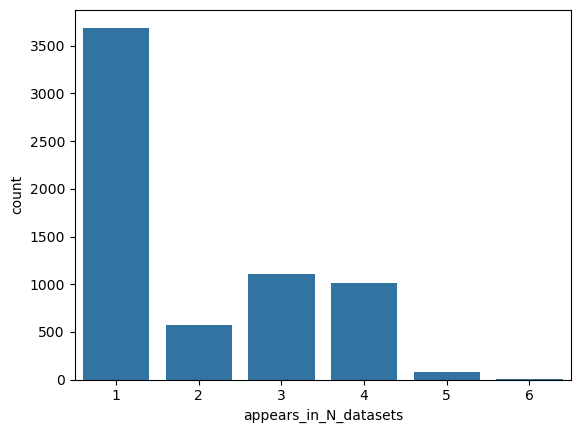

In [30]:
sns.countplot(data=appears, x="appears_in_N_datasets")

In [31]:
combined_literature_chembl_w_counts = combined_literature_chembl.merge(appears, on="INCHIKEY")
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays,appears_in_N_datasets
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN,1
1,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN,1
2,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,LFBZZHVSGAHQPP-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN,1
3,CC(=O)C1(O)C=C2C(=O)c3c(c(O)c4ccccc4c3O)C(=O)C...,SZWGDFGULWLMIP-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN,1
4,COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC,GFNNBHLJANVSQV-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,CS(=O)(=O)N1N=C(c2ccc(Br)cc2)CC1c1ccc2c(c1)OCO2,QZDMSRWCNXBDIE-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.20,NaN,1.0,3
12974,COC(=O)CSc1nnc(C)n1-c1cccc(OC)c1,AOIHZLCKLGKTMY-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.50,NaN,1.0,1
12975,O=C(NCc1ccc2c(c1)OCO2)C1CC(c2cccc(Br)c2)=NO1,UHEQYUBAQCODRU-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.05,NaN,1.0,3
12976,Cc1cc([N+](=O)[O-])nn1CC(=O)NNC(=S)Nc1ccc(F)cc1,NHAMYHXRNZPFDZ-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,8.25,NaN,1.0,1


In [32]:
df_dummies = pd.get_dummies(combined_literature_chembl_w_counts['dataset'], prefix='dataset').join(combined_literature_chembl_w_counts["INCHIKEY"])
df_dummies

,dataset_ FDA,dataset_ChEMBL_curated,dataset_aid1851,dataset_aid891,dataset_flockheart,dataset_ncats_adme_aid1645840,dataset_veith_2009,INCHIKEY
0,False,False,False,False,False,True,False,JNODQFNWMXFMEV-UHFFFAOYSA-N
1,False,False,False,False,False,True,False,KZNIFHPLKGYRTM-UHFFFAOYSA-N
2,False,False,False,False,False,True,False,LFBZZHVSGAHQPP-UHFFFAOYSA-N
3,False,False,False,False,False,True,False,SZWGDFGULWLMIP-UHFFFAOYSA-N
4,False,False,False,False,False,True,False,GFNNBHLJANVSQV-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...
12973,False,True,False,False,False,False,False,QZDMSRWCNXBDIE-UHFFFAOYSA-N
12974,False,True,False,False,False,False,False,AOIHZLCKLGKTMY-UHFFFAOYSA-N
12975,False,True,False,False,False,False,False,UHEQYUBAQCODRU-UHFFFAOYSA-N
12976,False,True,False,False,False,False,False,NHAMYHXRNZPFDZ-UHFFFAOYSA-N


In [33]:
df_result = df_dummies.groupby('INCHIKEY').max().reset_index()
df_result = df_result.set_index("INCHIKEY")

In [34]:
# cat_dataname = combined_literature_chembl.groupby("INCHIKEY")["dataset"].apply(lambda x: "_+_".join(x)).reset_index(name="dataset_comb").set_index("INCHIKEY")
# cat_dataname

In [35]:
combined_literature_chembl_w_counts = combined_literature_chembl_w_counts.merge(df_result, on="INCHIKEY")
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays,appears_in_N_datasets,dataset_ FDA,dataset_ChEMBL_curated,dataset_aid1851,dataset_aid891,dataset_flockheart,dataset_ncats_adme_aid1645840,dataset_veith_2009
0,Cc1ccc2c(c1)c1c(n2CCc2ccc(C)nc2)CCN(C)C1,JNODQFNWMXFMEV-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN,1,False,False,False,False,False,True,False
1,O=c1cc(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,KZNIFHPLKGYRTM-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN,1,False,False,False,False,False,True,False
2,CC1=NN=C(c2ccc(N)cc2)c2cc3c(cc2C1)OCO3,LFBZZHVSGAHQPP-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN,1,False,False,False,False,False,True,False
3,CC(=O)C1(O)C=C2C(=O)c3c(c(O)c4ccccc4c3O)C(=O)C...,SZWGDFGULWLMIP-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN,1,False,False,False,False,False,True,False
4,COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC,GFNNBHLJANVSQV-UHFFFAOYSA-N,True,ncats_adme_aid1645840,assay,NaN,inhibitor,NaN,NaN,NaN,NaN,NaN,1,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,CS(=O)(=O)N1N=C(c2ccc(Br)cc2)CC1c1ccc2c(c1)OCO2,QZDMSRWCNXBDIE-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.20,NaN,1.0,3,False,True,True,False,False,False,True
12974,COC(=O)CSc1nnc(C)n1-c1cccc(OC)c1,AOIHZLCKLGKTMY-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,5.50,NaN,1.0,1,False,True,False,False,False,False,False
12975,O=C(NCc1ccc2c(c1)OCO2)C1CC(c2cccc(Br)c2)=NO1,UHEQYUBAQCODRU-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,6.05,NaN,1.0,3,False,True,True,False,False,False,True
12976,Cc1cc([N+](=O)[O-])nn1CC(=O)NNC(=S)Nc1ccc(F)cc1,NHAMYHXRNZPFDZ-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,NaN,NaN,NaN,NaN,8.25,NaN,1.0,1,False,True,False,False,False,False,False


In [36]:
combined_literature_chembl_w_counts.action_type.value_counts()

action_type
inhibitor     8950
 inhibitor       4
Name: count, dtype: int64

In [37]:
combined_literature_chembl_w_counts.INCHIKEY.nunique()

6465

In [38]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

12623

In [39]:
# we can just sort by appears_in_N_ChEMBL_assays to get all the chembl data at the top, then uniquify on INCHIKEY

combined_literature_chembl_w_counts.sort_values(["appears_in_N_ChEMBL_assays", "appears_in_N_datasets"], ascending=[False,False],  inplace=True)


In [40]:
# fill common name from gropupby 
combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


/tmp/ipykernel_118027/1877288904.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
/tmp/ipykernel_118027/1877288904.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [41]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

11817

In [42]:
combined_literature_chembl_w_counts.drop(columns=["dataset","data_type"], inplace=True)

In [43]:
combined_literature_chembl_w_counts.head()

,CANONICAL_SMILES,INCHIKEY,active,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays,appears_in_N_datasets,dataset_ FDA,dataset_ChEMBL_curated,dataset_aid1851,dataset_aid891,dataset_flockheart,dataset_ncats_adme_aid1645840,dataset_veith_2009
8875,COC(=O)C1[C@@H](O)CC[C@H]2CN3CCc4c([nH]c5ccccc...,BLGXFZZNTVWLAY-UKQGOTKBSA-N,True,NaN,NaN,NaN,NaN,6.220000,1.003707,15.0,3,False,True,True,True,False,False,False
8876,CC(C)NC[C@@H](O)COc1cccc2ccccc12,AQHHHDLHHXJYJD-CQSZACIVSA-N,True,DEXPROPRANOLOL,NaN,NaN,NaN,5.209231,0.262883,13.0,4,False,True,True,True,False,True,False
8877,CNCC[C@H](Oc1ccc(C(F)(F)F)cc1)c1ccccc1,RTHCYVBBDHJXIQ-INIZCTEOSA-N,True,NaN,NaN,NaN,NaN,5.520000,0.335989,10.0,3,False,True,True,True,False,False,False
8878,C=C[C@H]1CN2CC[C@H]1C[C@@H]2[C@@H](O)c1ccnc2cc...,LOUPRKONTZGTKE-LHHVKLHASA-N,True,QUINIDINE SULFATE,NaN,NaN,NaN,7.613750,0.526984,9.0,3,True,True,False,False,True,False,False
8879,COC(=O)C1[C@H]2C[C@H]3c4[nH]c5ccccc5c4CCN3C[C@...,BLGXFZZNTVWLAY-AMZRAFDVSA-N,True,YOHIMBINE,NaN,NaN,NaN,6.127500,1.274192,8.0,5,False,True,True,True,False,True,True


In [44]:
fda_reccomends_mask = combined_literature_chembl_w_counts.INCHIKEY.isin(fda.INCHIKEY)

fda_reccomends_mask

8875    False
8876    False
8877    False
8878     True
8879    False
        ...  
8855    False
8859    False
8862    False
8869    False
8874    False
Name: INCHIKEY, Length: 12978, dtype: bool

In [45]:
# combined_literature_chembl_w_counts["FDA_recommended"] = combined_literature_chembl_w_counts["FDA_recommended"][fda_reccomends_mask] = True

In [46]:
combined_literature_chembl_w_counts["FDA_recommended"] = fda_reccomends_mask

In [47]:
combined_literature_chembl_w_counts.drop_duplicates(subset="INCHIKEY", inplace=True)

In [48]:
combined_literature_chembl_w_counts["action_type"] = combined_literature_chembl_w_counts["action_type"].fillna("inhibitor")

In [49]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["appears_in_N_ChEMBL_assays"].fillna(0) + combined_literature_chembl_w_counts["appears_in_N_datasets"].fillna(0)

In [50]:
combined_literature_chembl_w_counts.sort_values("inclusion_score", ascending=False, inplace=True)

In [51]:
combined_literature_chembl_w_counts.to_csv("final/actives_final.csv", index=False)

In [52]:
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,common_name,action_type,SMILES,FDA_recommended,pChEMBL mean,pChEMBL std,appears_in_N_ChEMBL_assays,appears_in_N_datasets,dataset_ FDA,dataset_ChEMBL_curated,dataset_aid1851,dataset_aid891,dataset_flockheart,dataset_ncats_adme_aid1645840,dataset_veith_2009,inclusion_score
8875,COC(=O)C1[C@@H](O)CC[C@H]2CN3CCc4c([nH]c5ccccc...,BLGXFZZNTVWLAY-UKQGOTKBSA-N,True,NaN,inhibitor,NaN,False,6.220000,1.003707,15.0,3,False,True,True,True,False,False,False,18.0
8876,CC(C)NC[C@@H](O)COc1cccc2ccccc12,AQHHHDLHHXJYJD-CQSZACIVSA-N,True,DEXPROPRANOLOL,inhibitor,NaN,False,5.209231,0.262883,13.0,4,False,True,True,True,False,True,False,17.0
8879,COC(=O)C1[C@H]2C[C@H]3c4[nH]c5ccccc5c4CCN3C[C@...,BLGXFZZNTVWLAY-AMZRAFDVSA-N,True,YOHIMBINE,inhibitor,NaN,False,6.127500,1.274192,8.0,5,False,True,True,True,False,True,True,13.0
8877,CNCC[C@H](Oc1ccc(C(F)(F)F)cc1)c1ccccc1,RTHCYVBBDHJXIQ-INIZCTEOSA-N,True,NaN,inhibitor,NaN,False,5.520000,0.335989,10.0,3,False,True,True,True,False,False,False,13.0
8882,CN(C)CCOC(c1ccccc1)c1ccccc1,ZZVUWRFHKOJYTH-UHFFFAOYSA-N,True,DIPHENHYDRAMINE,inhibitor,NaN,False,5.260000,0.321248,7.0,6,False,True,True,True,True,True,True,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8855,COc1ccc2c(c1)N(C[C@H](C)CN(C)C)c1ccccc1S2,VRQVVMDWGGWHTJ-CQSZACIVSA-N,True,levomepromazine,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,False,True,False,False,1.0
8859,COc1ccc(OC)c(C(O)CNC(=O)CN)c1,PTKSEFOSCHHMPD-UHFFFAOYSA-N,True,midodrine,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,False,True,False,False,1.0
8862,Cc1[nH]c2ccccc2c1CCNCc1ccc(/C=C/C(O)=NO)cc1,FPOHNWQLNRZRFC-ZHACJKMWSA-N,True,panobinostat,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,False,True,False,False,1.0
8869,C[C@@H](OC[C@@]1(c2ccccc2)CC[C@]2(CCC(=O)N2)CN...,FIVSJYGQAIEMOC-ZGNKEGEESA-N,True,rolapitant,inhibitor,NaN,False,NaN,NaN,NaN,1,False,False,False,False,True,False,False,1.0


In [53]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["inclusion_score"].astype(int)

<Axes: xlabel='inclusion_score', ylabel='count'>

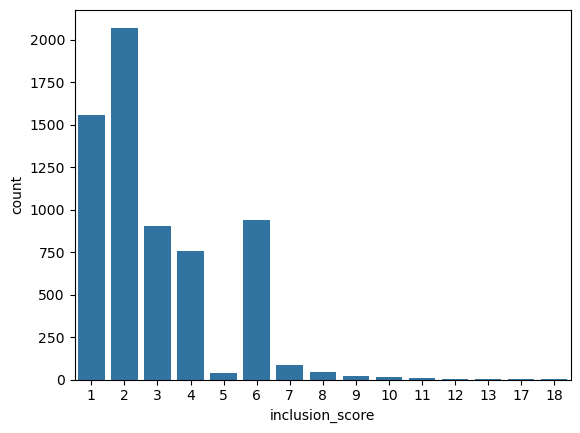

In [54]:
sns.countplot(combined_literature_chembl_w_counts, x="inclusion_score")

<Axes: xlabel='pChEMBL mean', ylabel='Count'>

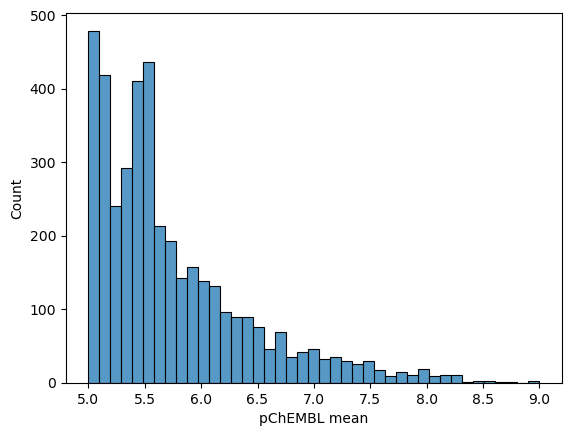

In [55]:
sns.histplot(combined_literature_chembl_w_counts, x="pChEMBL mean")